## Vehicle Claim Fraud Detection

### EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('..\\Datasets\\HW3\\fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
df_1 = df.copy()
df_1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
to_object = ['DriverRating']
df_1[to_object] = df_1[to_object].astype('object')

DriverRating variabele is converted to object, since it is a categorical variable (has just 1, 2, 3 and 4 values)

In [6]:
df_1.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [7]:
missing_values = df_1.isnull().sum()
missing_values

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Variables such as Sex, AccidentArea, Fault, PoliceReportFiled, WitnessPresent, and AgentType can be considered boolean variables, so the type of these variables is converted below:

In [8]:
to_bool = ['Sex', 'AccidentArea', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
df_1['AccidentArea'] = df_1['AccidentArea'].apply(lambda x: True if x == 'Urban' else False) #True: Urban and False: Rural
df_1['Sex'] = df_1['Sex'].apply(lambda x: True if x == 'Female' else False) #True: Female and False: Male
df_1['Fault'] = df_1['Fault'].apply(lambda x: True if x == 'Policy Holder' else False) #True: Policy Holder and False: Third Party
df_1['AgentType'] = df_1['AgentType'].apply(lambda x: True if x == 'External' else False) #True: External and False: Internal
df_1['PoliceReportFiled'] = df_1['PoliceReportFiled'].apply(lambda x: True if x == 'Yes' else False) #True: Yes and False: No
df_1['WitnessPresent'] = df_1['WitnessPresent'].apply(lambda x: True if x == 'Yes' else False) #True: Yes and False: No

df_1[to_bool] = df_1[to_bool].astype('bool')

In [9]:
cat_cols= df_1.select_dtypes(include=['object','category']).columns
df_1[cat_cols].describe()

,Month,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,PolicyType,VehicleCategory,VehiclePrice,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,8,13,4,9,3,6,4,5,4,4,8,9,4,5,5,3
top,Jan,Monday,Pontiac,Monday,Jan,Married,Sedan - Collision,Sedan,20000 to 29000,1,more than 30,more than 30,2 to 4,7 years,31 to 35,none,no change,1 vehicle,Collision
freq,1411,2616,3837,3757,1446,10625,5584,9671,8079,3944,15247,15342,5485,5807,5593,7047,14324,14316,5962


There may be possible errors or null values in the variables DayOfWeekClaimed (8 unique values), MonthClaimed (13 unique values)

In [10]:
df_1['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [11]:
df_1['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

This is a record that has a zero value in the DayOfWeekClaimed and MonthClaimed fields. We give these two variables a null value for this record

In [12]:
df_1['DayOfWeekClaimed'] = df_1['DayOfWeekClaimed'].replace('0', np.nan)
df_1['MonthClaimed'] = df_1['MonthClaimed'].replace('0', np.nan)

Looking for outliers:

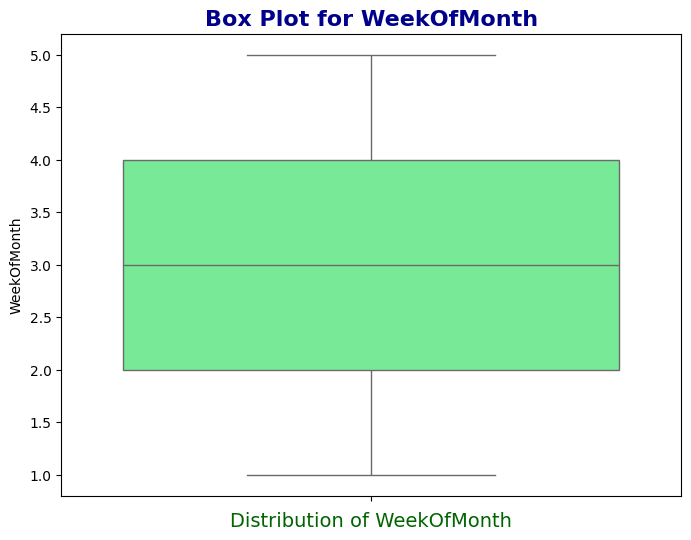

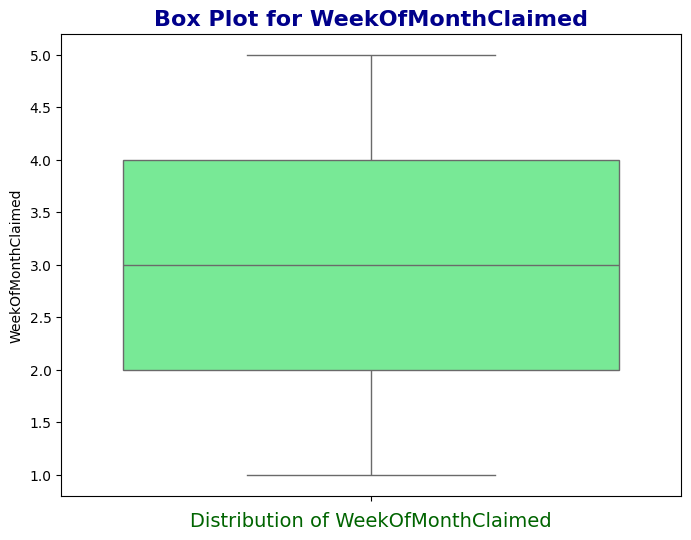

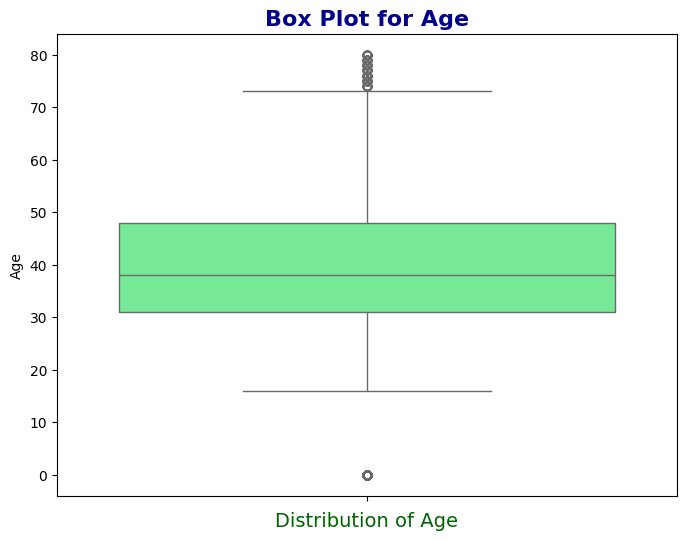

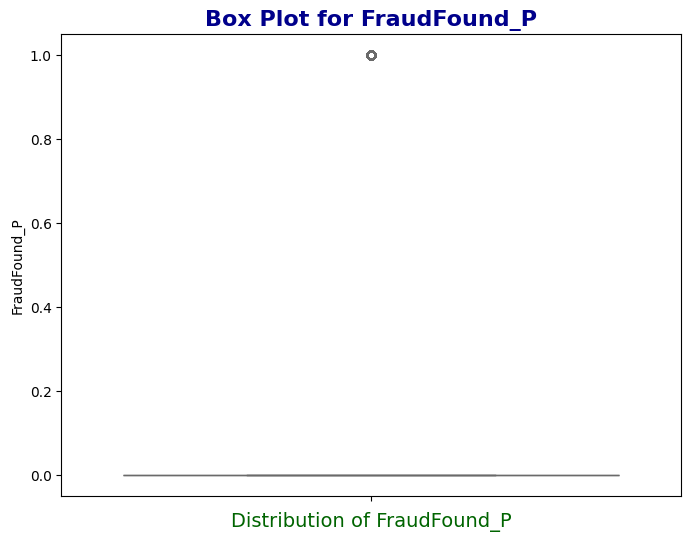

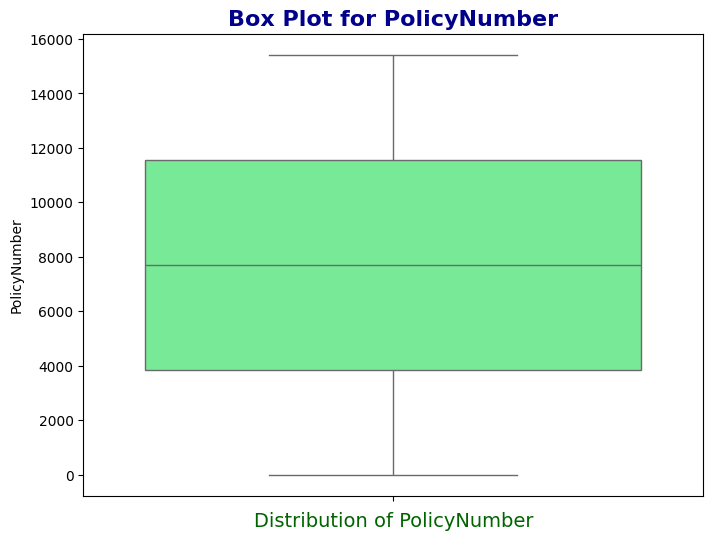

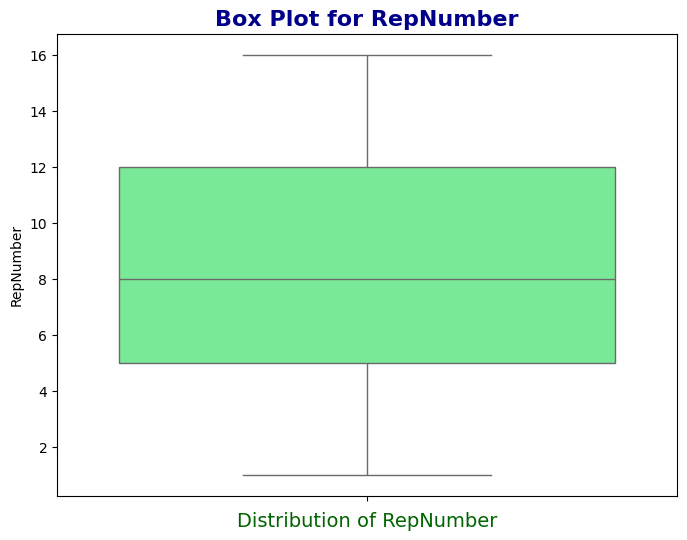

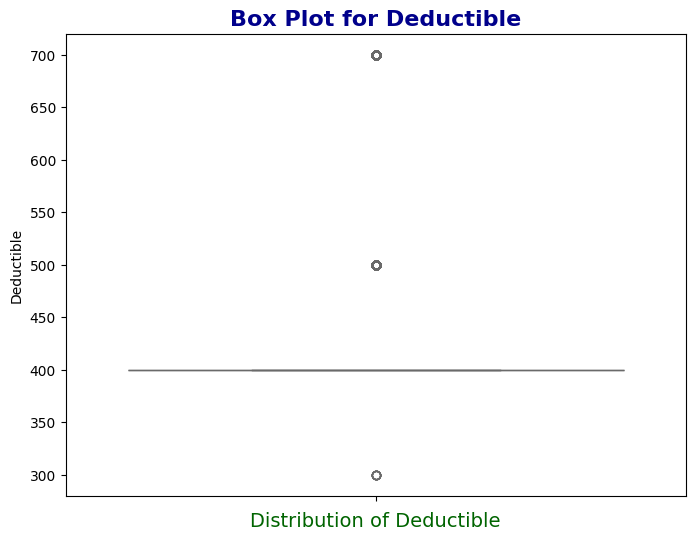

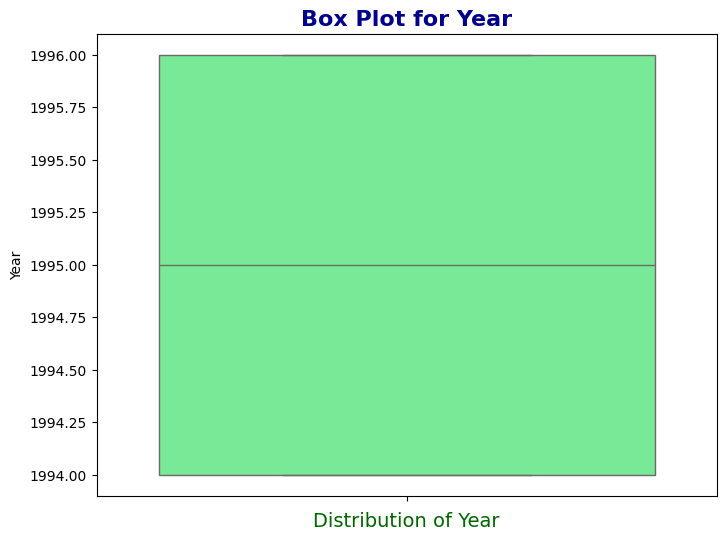

In [13]:
num_cols = df_1.select_dtypes(exclude=['object', 'category', 'bool']).columns

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_1[col], color='#65fc8d')
    plt.title(f'Box Plot for {col}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(f'Distribution of {col}', fontsize=14, color='darkgreen')
    plt.show()

In [14]:
df_1['Age'].value_counts().sort_index()

Age
0     320
16      9
17      6
18     48
19     32
     ... 
76     42
77     29
78     35
79     20
80     32
Name: count, Length: 66, dtype: int64

A number of records in the **Age** variable with a value of zero were detected. And some outliers ​​are also observed in older people (over 72 years old)

In [15]:
df_1['Age'] = df_1['Age'].replace(0, np.nan)

The zero values ​​of the variable Age are then given a null value.

In [16]:
df_1.drop('AgeOfPolicyHolder', axis=1, inplace=True)

age_bins = [15, 20, 25, 30, 40, 50, 65, 100]
age_labels = ['16-20', '21-25', '26-30', '31-40', '41-50', '51-65', 'over 65']

df_1['Age_tram'] = pd.cut(df_1['Age'], bins=age_bins, labels=age_labels)

df_1['Age_tram'] = df_1['Age_tram'].cat.add_categories(['unknown'])
df_1['Age_tram'].fillna('unknown', inplace=True)

df_1['Age_tram'] = df_1['Age_tram'].astype('object')

df_1['Age_tram'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7988\616124667.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['Age_tram'].fillna('unknown', inplace=True)


Age_tram
31-40      4828
41-50      3475
26-30      2783
51-65      2770
21-25       613
over 65     508
unknown     320
16-20       123
Name: count, dtype: int64

The datset includes the variable AgeOfPolicyHolder, which is the variable Age by ranges. However, inconsistencies are observed in the assigned values.
The AgeOfPolicyHolder variable is deleted and a new variable, Age_tram, is created, correcting inconsistencies.

It is detected that the PolicyType variable collects both the information to the type of vehicle (VehicleCategory) and the variable that refers to the type of coverage offered by the insurance policy (BasePolicy). Therefore, it does not offer us additional information to what we already have, in addition to being able to cause correlation problems between explanatory variables.

In [17]:
df_1['PolicyType'].value_counts()

PolicyType
Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: count, dtype: int64

In [18]:
df_1[num_cols].describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,Year
count,15420.000000,15420.000000,15100.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,40.700331,0.059857,7710.500000,8.483268,407.704280,1994.866472
std,1.287585,1.259115,12.309493,0.237230,4451.514911,4.599948,43.950998,0.803313
min,1.000000,1.000000,16.000000,0.000000,1.000000,1.000000,300.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1994.000000
50%,3.000000,3.000000,39.000000,0.000000,7710.500000,8.000000,400.000000,1995.000000
75%,4.000000,4.000000,49.000000,0.000000,11565.250000,12.000000,400.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,1996.000000


Correlation heatmap of numerical variables:

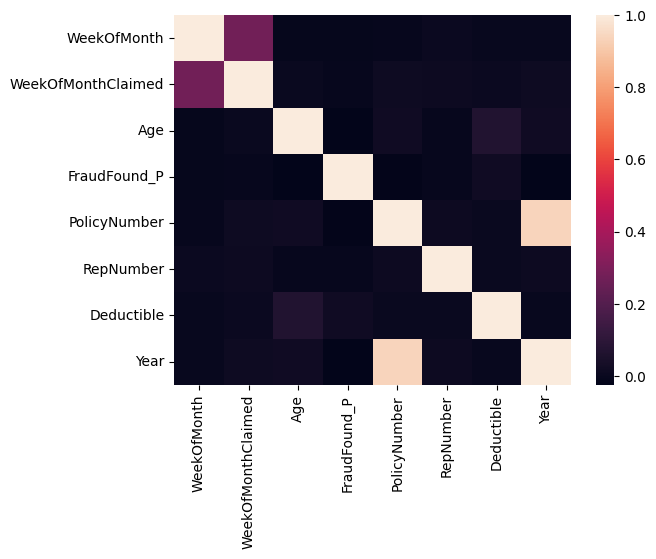

In [19]:
df_correlacion = df_1[num_cols]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

Visualizing distribution of numerical variables:

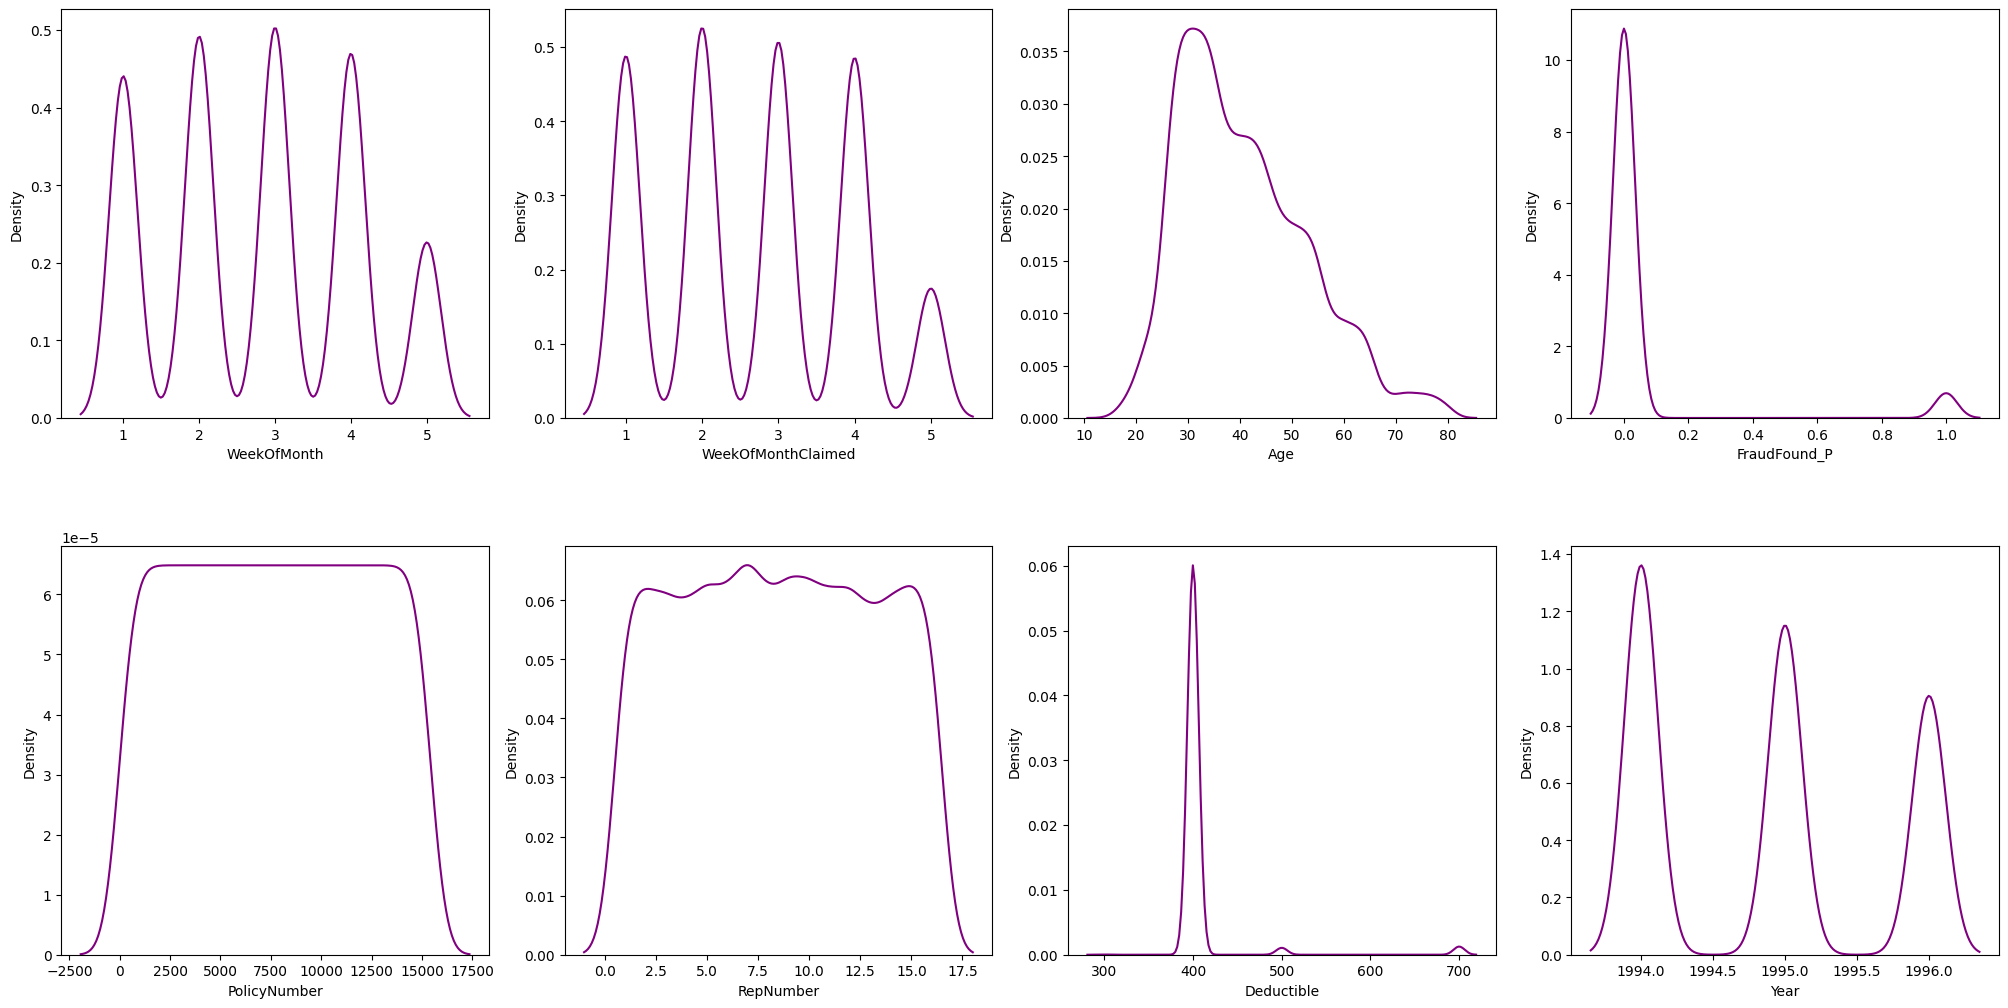

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

index = 0
for k,v in df_1[num_cols].items():
    if  (k == 'count'):
        sns.countplot(v, ax=axs[index])
    else:
        sns.kdeplot(v, ax=axs[index], color='purple')
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

- The week in which the claim occurs and the week in which the claim is processed follow a similar distribution.
- The imbalance between the classes of the target variable is noted with a clear number of non-fraudulent claims.
- The policy number does not provide any relevant information.
- The number of the policyholder's agent or mediator also does not seem to provide any significant information.
- The most commonly used deductible value in policies is 400. We have to process this variable.
- The year of the claim also does not seem to show a relevant pattern.

Visualizing count of categorical variables:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7988\2595981508.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7988\2595981508.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7988\2595981508.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7988\2595981508.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

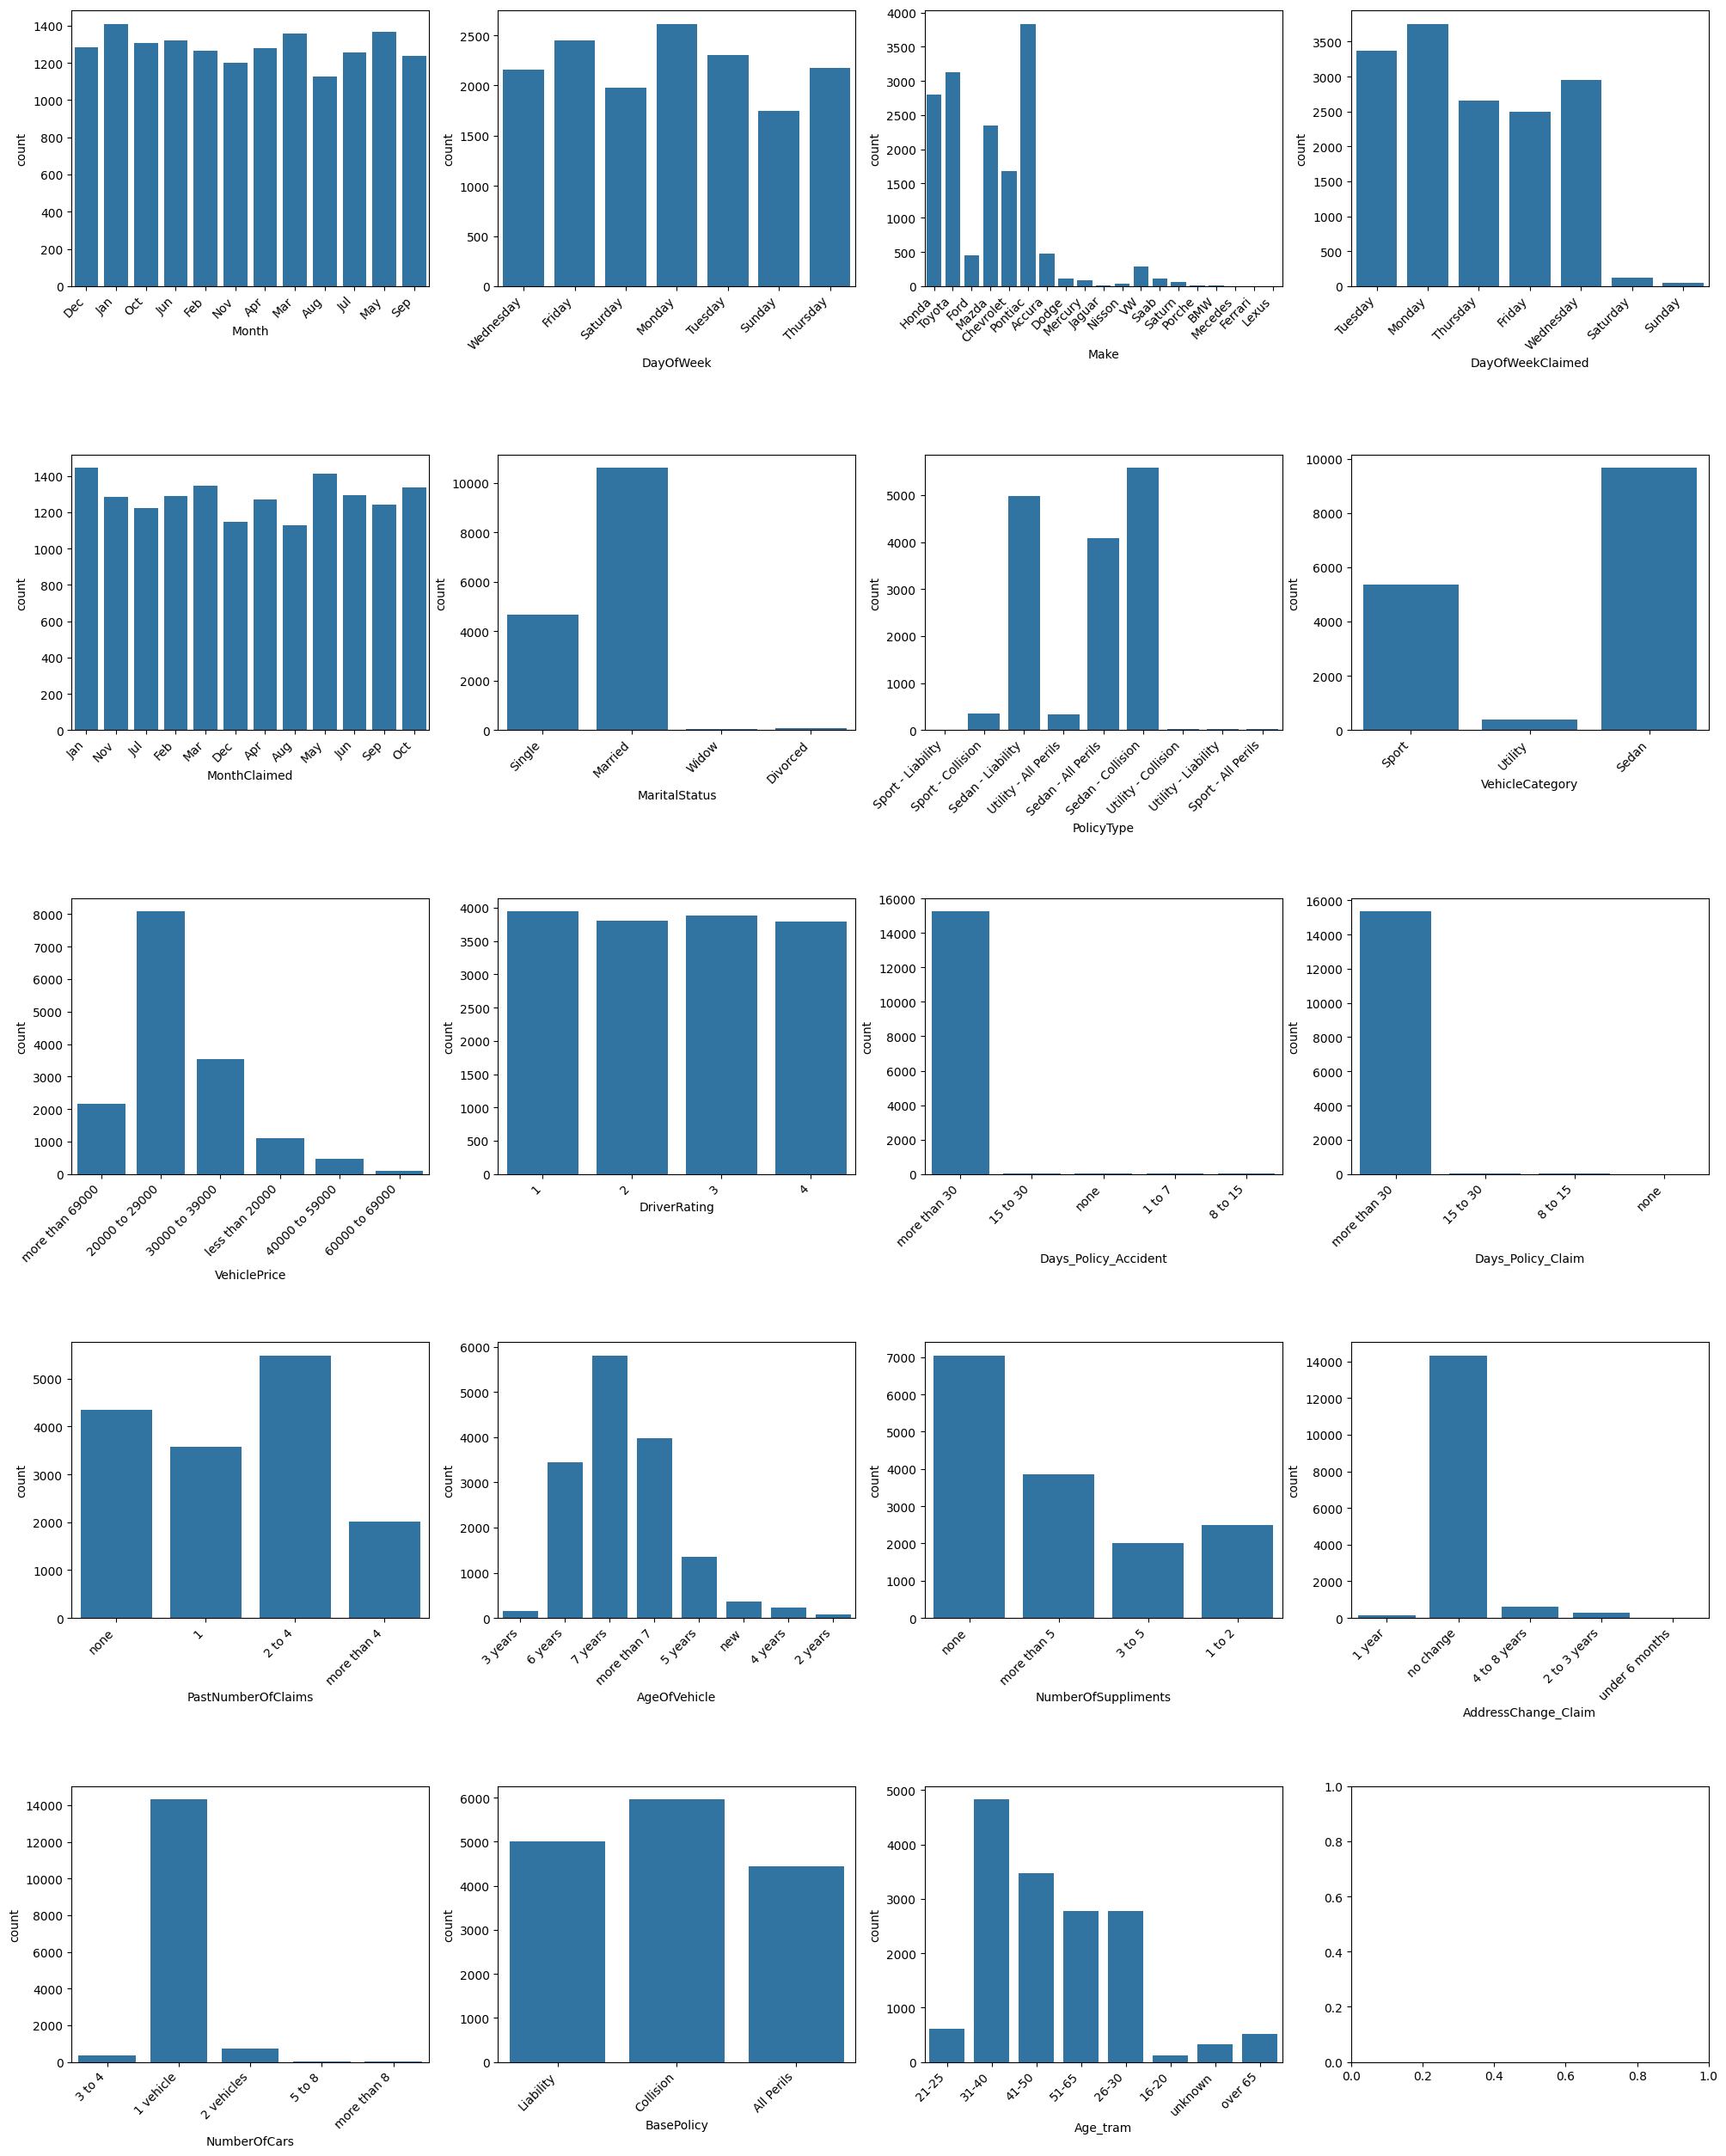

In [21]:
cat_cols= df_1.select_dtypes(include=['object','category']).columns
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axs = axs.flatten()

index = 0
for k,v in df_1[cat_cols].items():
    sns.countplot(x=v, ax=axs[index])
    axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=45, ha='right')
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [23]:
df_1v = df_1.copy()
df_1v['FraudFound_P'] = df_1['FraudFound_P'].astype('bool')

cat_cols= df_1v.select_dtypes(include=['object', 'category', 'bool']).columns

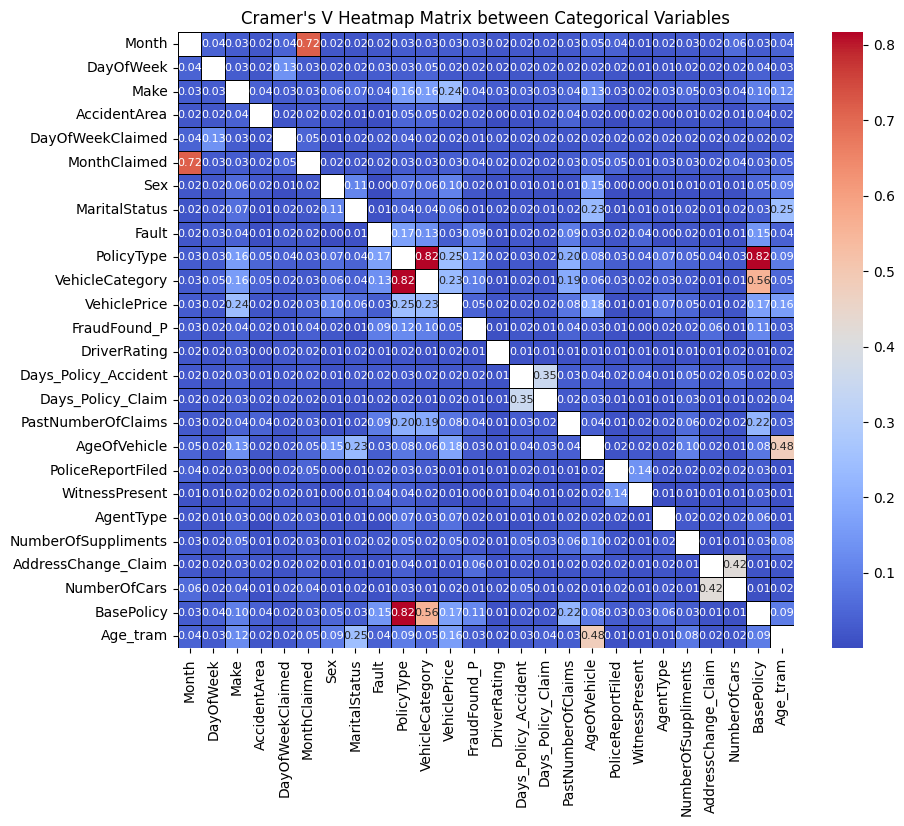

In [24]:
from scipy.stats import chi2_contingency

cramers_v_matrix = np.zeros((len(cat_cols), len(cat_cols)))

for i in range(len(cat_cols)):
    for j in range(len(cat_cols)):
        if i == j:
            cramers_v_matrix[i, j] = np.nan
        else:
            contingency_table = pd.crosstab(df_1v[cat_cols[i]], df_1v[cat_cols[j]])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / n / min(contingency_table.shape))
            cramers_v_matrix[i, j] = cramers_v

cramers_v_df = pd.DataFrame(cramers_v_matrix, index=cat_cols, columns=cat_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', square=True, cbar=True,
            linewidths=.5, linecolor='black', annot_kws={"size": 8}, fmt=".2f")
plt.title("Cramer's V Heatmap Matrix between Categorical Variables")
plt.show()

- The variable “PolicyType” with the variables “BasePolicy” and “Vehicle Category”. These three variables show clear collinearity because the variable “PolicyType” contains both the “VehicleCategory” and the “BasePolicy” in a concatenated manner.
- The variable “Month” and the variable “MonthClaimed” also contain a strong dependence because many of claims will be processed in the same month in which the claim occurs.
- The strongest relationships with the target variable (“FraudFound_P”) are, from highest to lowest, “PolicyType”, “BasePolicy”, “VehicleCategory”, and the variable “Fault” (which denotes the guilt or not of the policyholder in the claim).
- Other interesting relationships are the age of the vehicle with the age of the policyholder and with the marital status.

We delete certain variables that we have either modified (Age_tram) or that we consider already include information included in other variables (PolicyType). We also delete the variable that refers to the policy ID (PolicyNumber, RepNumber). Also, date variables are deleted in which no correlation with the target variable is observed.

In [25]:
df_2 = df_1.copy()
to_delete = ['Age_tram', 'PolicyType', 'PolicyNumber', 'Year', 'RepNumber', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed',
             'Month', 'WeekOfMonth', 'DayOfWeek', 'Days_Policy_Accident']

df_3 = df_2.drop(to_delete, axis=1)

Each of the categorical variables is transformed into dummy variables:

In [26]:
variables_dummies= df_3.select_dtypes(include=['object','category']).columns
df_4 = df_3.copy()

for k in variables_dummies:
    dummies = pd.get_dummies(df_4[k],prefix=k)
    df_4 = pd.concat([df_4, dummies], axis=1)

df_4 = df_4.drop(variables_dummies, axis=1)

An imputation of the null values ​​is carried out, which can have an important influence on the results. It is decided to apply an imputation based on the K nearest neighbors (KNN Imputation), so that the age value is imputed to the null values ​​based on other nearby points in the database.

In [27]:
from sklearn.impute import KNNImputer

df_4_dtypes = df_4.dtypes

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_4)

df_imputed = pd.DataFrame(df_imputed, columns=df_4.columns)
df_4 = np.round(df_imputed, 0).astype(int)

for col, dtype in df_4_dtypes.items():
    df_4[col] = df_4[col].astype(dtype)

In [28]:
df_4['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15420 entries, 0 to 15419
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
15420 non-null  float64
dtypes: float64(1)
memory usage: 120.6 KB


In [29]:
df_3['Age'] = df_4['Age']

### Machine-Learning models

In [30]:
df_ml = df_4.copy()

In [244]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report, roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier


X = df_ml.drop('FraudFound_P',axis=1)
y = df_ml['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [84]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [85]:
num_cols = X_train.select_dtypes(exclude=['object','category', 'bool']).columns

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [86]:
def roc_graph(test,pred):
    fpr, tpr, thresholds = roc_curve(test,pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend(loc="lower right")
    plt.show()

In [87]:
def get_metrics(y1, y2):
    print('Accuracy: ', accuracy_score(y1, y2))
    print('Precision: ', precision_score(y1, y2))
    print('Recall: ', recall_score(y1, y2))
    print('f1: ', f1_score(y1, y2))
    print('Confusion Matrix: ')
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC: ', roc_auc)
    print(confusion_matrix(y1, y2))

In [88]:
def conf_mat(test, pred):
    cm = confusion_matrix(test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predictions')
    plt.ylabel('Real Values')
    plt.title('Confusion Matrix')
    plt.show()

- Logistic Regression

In [157]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
pred_lr_model = lr_model.predict(X_test)

In [158]:
print(classification_report(y_test, pred_lr_model))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.01      0.01       185

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.49      3084
weighted avg       0.94      0.94      0.91      3084



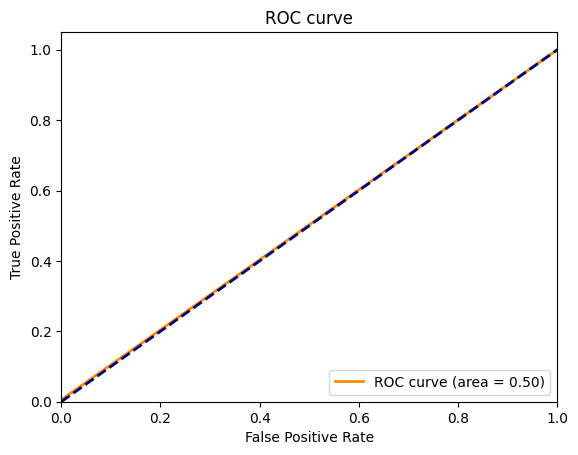

In [159]:
roc_graph(y_test, pred_lr_model)

In [160]:
get_metrics(y_test, pred_lr_model)

Accuracy:  0.940337224383917
Precision:  1.0
Recall:  0.005405405405405406
f1:  0.010752688172043012
Confusion Matrix: 
AUC:  0.5027027027027027
[[2899    0]
 [ 184    1]]


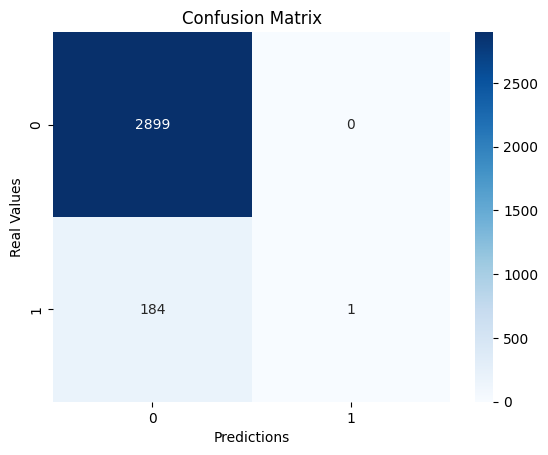

In [161]:
conf_mat(y_test, pred_lr_model)

- SVM

In [152]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
pred_svm_model = svm_model.predict(X_test)

In [153]:
print(classification_report(y_test, pred_svm_model))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

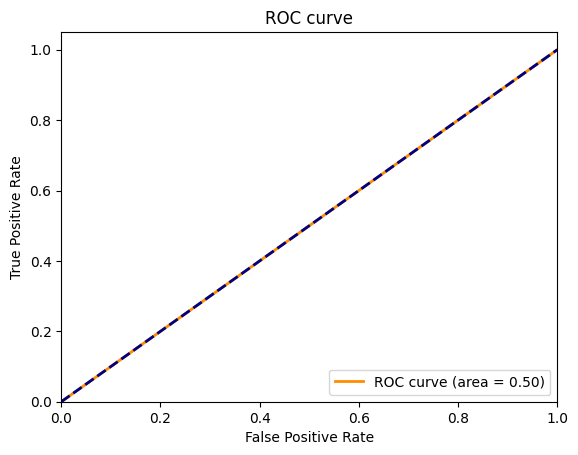

In [154]:
roc_graph(y_test, pred_svm_model)

In [155]:
get_metrics(y_test, pred_svm_model)

Accuracy:  0.9400129701686122
Precision:  0.0
Recall:  0.0
f1:  0.0
Confusion Matrix: 
AUC:  0.5
[[2899    0]
 [ 185    0]]


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


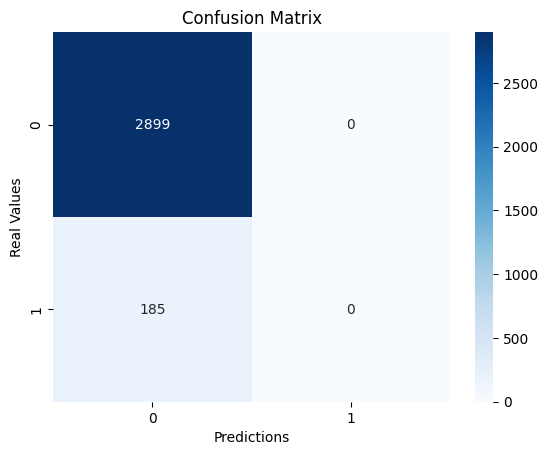

In [156]:
conf_mat(y_test, pred_svm_model)

- KNN

In [167]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
pred_knn_model = knn_model.predict(X_test)

In [168]:
print(classification_report(y_test, pred_knn_model))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2899
           1       0.19      0.03      0.05       185

    accuracy                           0.93      3084
   macro avg       0.57      0.51      0.51      3084
weighted avg       0.90      0.93      0.91      3084



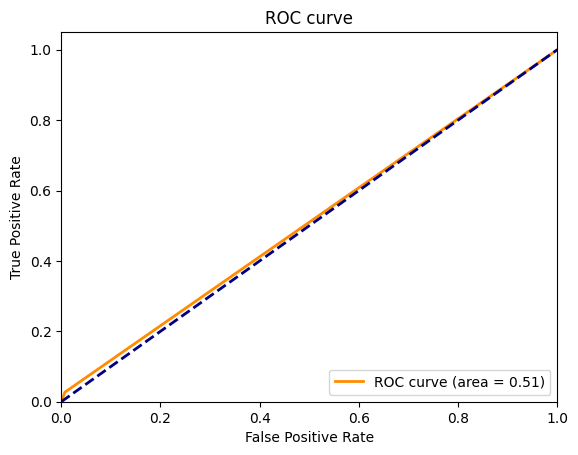

In [169]:
roc_graph(y_test, pred_knn_model)

In [170]:
get_metrics(y_test, pred_knn_model)

Accuracy:  0.9348249027237354
Precision:  0.19230769230769232
Recall:  0.02702702702702703
f1:  0.04739336492890995
Confusion Matrix: 
AUC:  0.5098915749139964
[[2878   21]
 [ 180    5]]


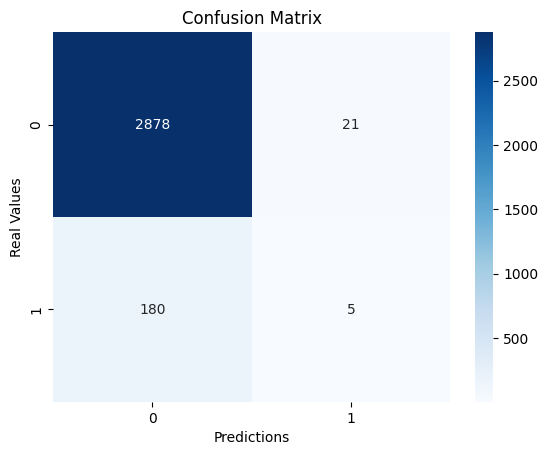

In [171]:
conf_mat(y_test, pred_knn_model)

- Naive Bayes

In [172]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred_nb_model = nb_model.predict(X_test)

In [173]:
print(classification_report(y_test, pred_nb_model))

              precision    recall  f1-score   support

           0       0.99      0.39      0.55      2899
           1       0.09      0.91      0.16       185

    accuracy                           0.42      3084
   macro avg       0.54      0.65      0.36      3084
weighted avg       0.93      0.42      0.53      3084



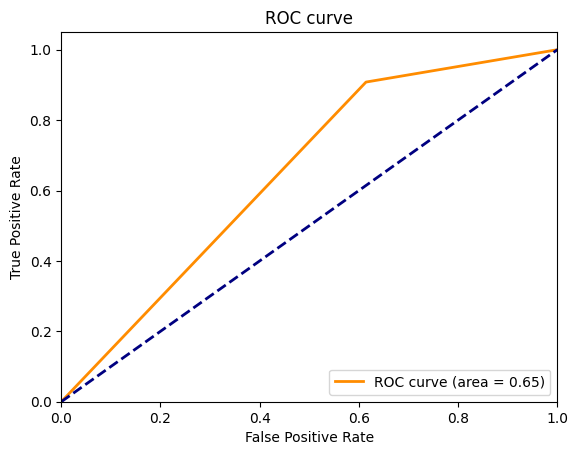

In [174]:
roc_graph(y_test, pred_nb_model)

In [175]:
get_metrics(y_test, pred_nb_model)

Accuracy:  0.4169909208819715
Precision:  0.086198050282196
Recall:  0.9081081081081082
f1:  0.15745079662605435
Confusion Matrix: 
AUC:  0.6468791661616774
[[1118 1781]
 [  17  168]]


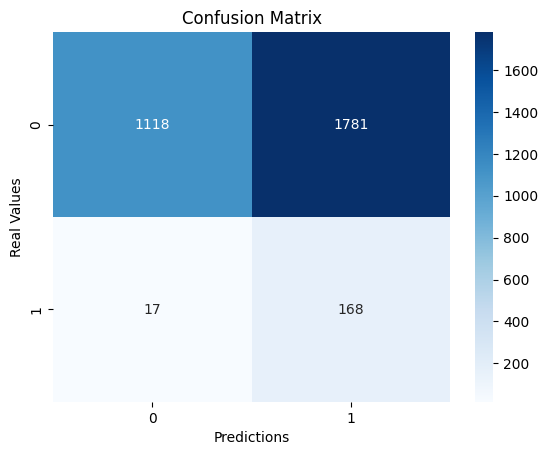

In [176]:
conf_mat(y_test, pred_nb_model)

- Decision Tree

In [148]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)
pred_dt_model = dt_model.predict(X_test)

In [149]:
print(classification_report(y_test, pred_dt_model))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2899
           1       0.15      0.19      0.16       185

    accuracy                           0.88      3084
   macro avg       0.55      0.56      0.55      3084
weighted avg       0.90      0.88      0.89      3084



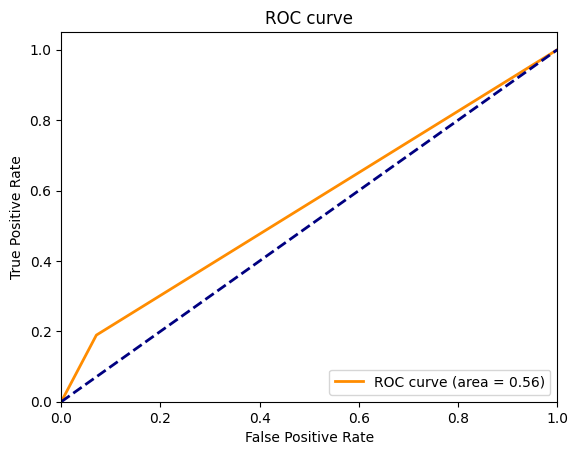

In [150]:
roc_graph(y_test, pred_dt_model)

In [151]:
get_metrics(y_test, pred_dt_model)

Accuracy:  0.8848897535667963
Precision:  0.14583333333333334
Recall:  0.1891891891891892
f1:  0.16470588235294117
Confusion Matrix: 
AUC:  0.5592375749326423
[[2694  205]
 [ 150   35]]


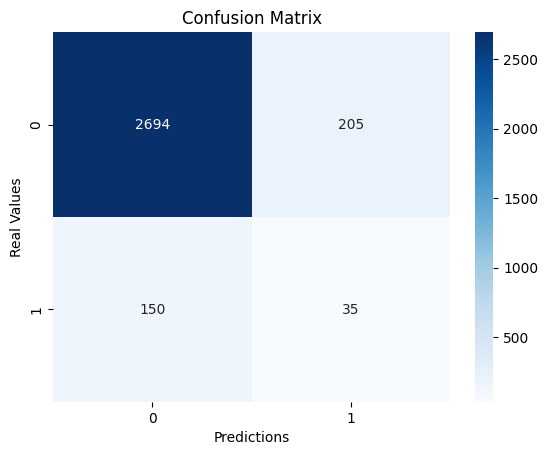

In [118]:
conf_mat(y_test, pred_dt_model)

- Random Forest:

In [119]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)
pred_rf_model = rf_model.predict(X_test)

In [120]:
print(classification_report(y_test, pred_rf_model))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2899
           1       0.33      0.05      0.08       185

    accuracy                           0.94      3084
   macro avg       0.64      0.52      0.53      3084
weighted avg       0.91      0.94      0.91      3084



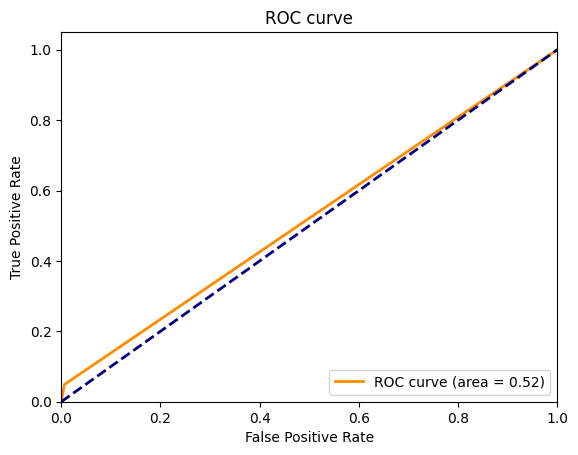

In [121]:
roc_graph(y_test, pred_rf_model)

In [122]:
get_metrics(y_test, pred_rf_model)

Accuracy:  0.937094682230869
Precision:  0.3333333333333333
Recall:  0.04864864864864865
f1:  0.08490566037735849
Confusion Matrix: 
AUC:  0.5212198055247382
[[2881   18]
 [ 176    9]]


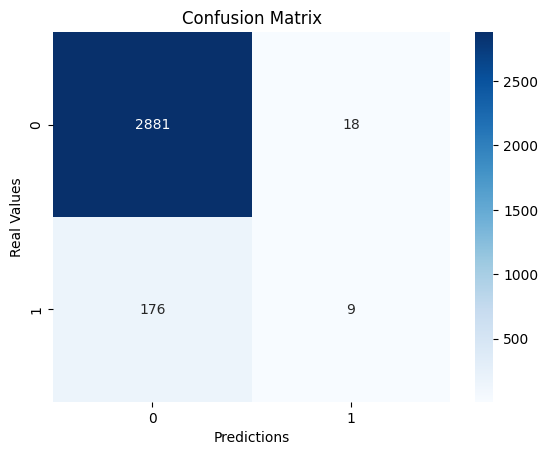

In [123]:
conf_mat(y_test, pred_rf_model)

- Gradient Boosting

In [177]:
gb_model = GradientBoostingClassifier(random_state=123)
gb_model.fit(X_train, y_train)
pred_gb_model = gb_model.predict(X_test)

In [178]:
print(classification_report(y_test, pred_gb_model))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.69      0.05      0.09       185

    accuracy                           0.94      3084
   macro avg       0.82      0.52      0.53      3084
weighted avg       0.93      0.94      0.92      3084



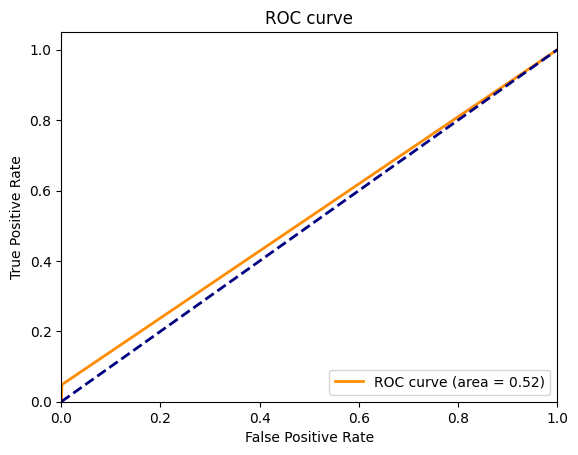

In [179]:
roc_graph(y_test, pred_gb_model)

In [180]:
get_metrics(y_test, pred_gb_model)

Accuracy:  0.9416342412451362
Precision:  0.6923076923076923
Recall:  0.04864864864864865
f1:  0.09090909090909091
Confusion Matrix: 
AUC:  0.5236344312577497
[[2895    4]
 [ 176    9]]


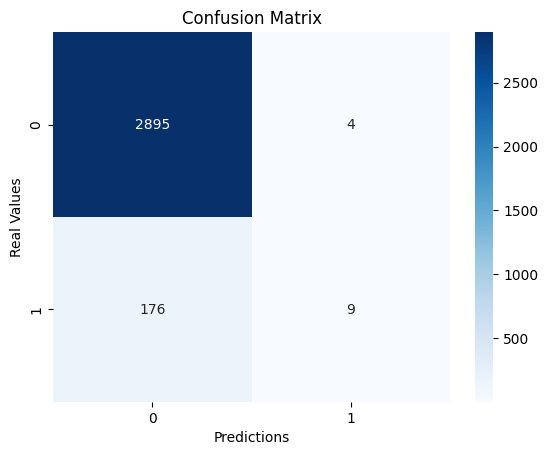

In [181]:
conf_mat(y_test, pred_gb_model)

- Vorting Model

In [129]:
voting_model = VotingClassifier(estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('dt', dt_model),
        ('gb', gb_model)
    ], voting='soft')
voting_model.fit(X_train, y_train)
pred_voting_model = voting_model.predict(X_test)

In [130]:
print(classification_report(y_test, pred_voting_model))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.77      0.05      0.10       185

    accuracy                           0.94      3084
   macro avg       0.86      0.53      0.54      3084
weighted avg       0.93      0.94      0.92      3084



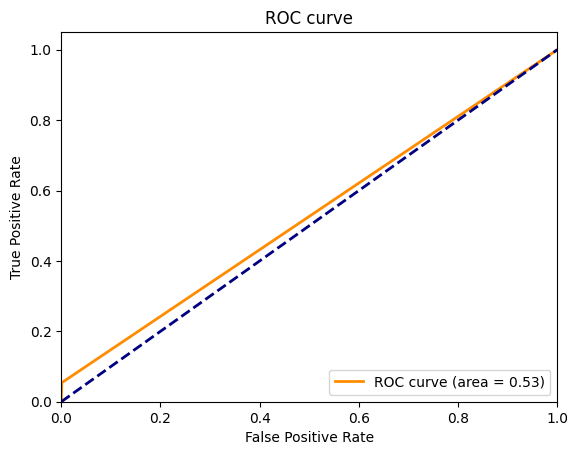

In [131]:
roc_graph(y_test, pred_voting_model)

In [132]:
get_metrics(y_test, pred_voting_model)

Accuracy:  0.9422827496757458
Precision:  0.7692307692307693
Recall:  0.05405405405405406
f1:  0.10101010101010101
Confusion Matrix: 
AUC:  0.5265096072270959
[[2896    3]
 [ 175   10]]


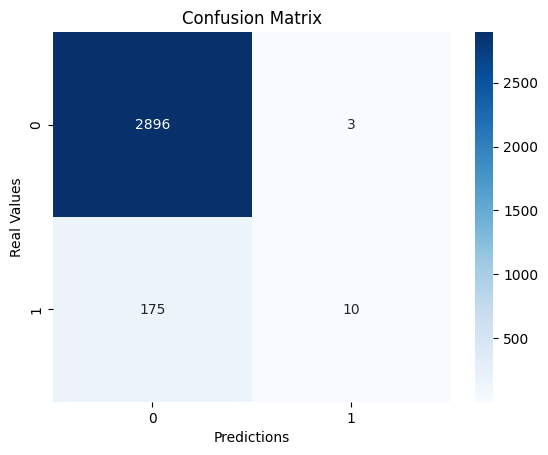

In [133]:
conf_mat(y_test, pred_voting_model)

- Extreme Gradinet Boosting

In [182]:
xgb_model = XGBClassifier(random_state=123)
xgb_model.fit(X_train, y_train)
pred_xgb_model = xgb_model.predict(X_test)

In [183]:
print(classification_report(y_test, pred_xgb_model))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2899
           1       0.33      0.06      0.11       185

    accuracy                           0.94      3084
   macro avg       0.64      0.53      0.54      3084
weighted avg       0.91      0.94      0.92      3084



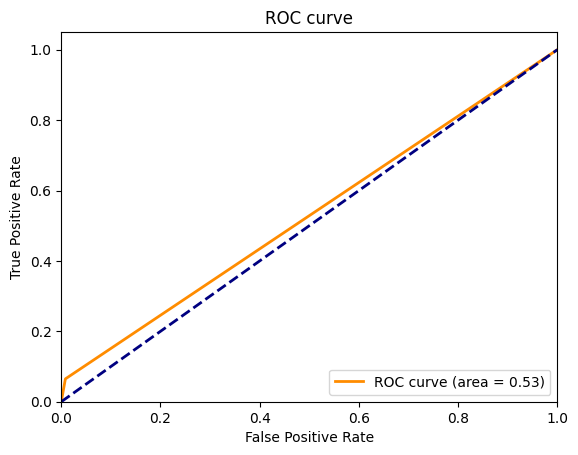

In [184]:
roc_graph(y_test, pred_xgb_model)

In [185]:
get_metrics(y_test, pred_xgb_model)

Accuracy:  0.9361219195849546
Precision:  0.3333333333333333
Recall:  0.06486486486486487
f1:  0.1085972850678733
Confusion Matrix: 
AUC:  0.5282930740329844
[[2875   24]
 [ 173   12]]


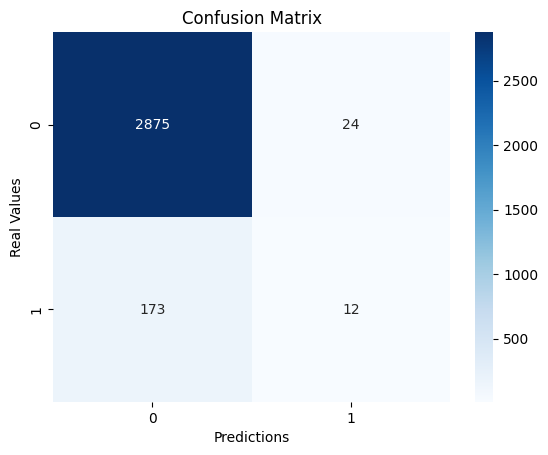

In [186]:
conf_mat(y_test, pred_xgb_model)

Among the models tested, the one that has shown the highest ROC indicator has been the decision tree model.

The confusion matrix and the results of the models in general show a high overall accuracy, but with low precision and recall. The model has difficulties in detecting positive cases. Since the positive cases detected are very low compared to false negatives and false positives, the model could be having difficulties in handling the imbalance in the classes. It is crucial to be able to improve the balance between the classes.

### Stratified cross-validation

In [191]:
models_cv = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "DT": DecisionTreeClassifier(random_state=123),
    "RF": RandomForestClassifier(random_state=123),
    "GB": GradientBoostingClassifier(random_state=123),
    "XGB": XGBClassifier(random_state=123),
}

def skf_comparison(models, X_train, y_train):

    results = []
    names = []

    for k, v in models.items():

        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
        cv_scores = cross_val_score(v, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('CV AUC: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-----------------------------------')

    return(results, names)


results, names = skf_comparison(models_cv, X_train, y_train)

Logistic Regression
CV AUC: 0.79988 +/- 0.01981
-----------------------------------
SVM
CV AUC: 0.47951 +/- 0.03011
-----------------------------------
KNN
CV AUC: 0.60904 +/- 0.01882
-----------------------------------
Naive Bayes
CV AUC: 0.76138 +/- 0.02397
-----------------------------------
DT
CV AUC: 0.57372 +/- 0.03153
-----------------------------------
RF
CV AUC: 0.77668 +/- 0.02559
-----------------------------------
GB
CV AUC: 0.82184 +/- 0.01802
-----------------------------------
XGB
CV AUC: 0.80598 +/- 0.02062
-----------------------------------


### Handling imbalance issue

There is a large imbalance between the classes. This produces problems in the estimation of the model, mainly in the detection of positive cases (low recall), in addition to observing a very variable precision.

The imbalance between classes can be solved by applying techniques such as OverSampling.

In [192]:
from imblearn.over_sampling import SMOTE

sampling_weights = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

lr_acc = []
svm_acc = []
knn_acc =[]
nb_acc = []
dt_acc =[]
rf_acc = []
gb_acc = []
xgb_acc =[]

lr_auc = []
svm_auc = []
knn_auc = []
nb_auc = []
dt_auc = []
rf_auc = []
gb_auc = []
xgb_auc = []

for i in sampling_weights:
    X = df_ml.drop('FraudFound_P', axis=1)
    y = df_ml['FraudFound_P']

    smote = SMOTE(sampling_strategy=i, random_state=42)

    X_resampled, y_resampled = smote.fit_resample(X, y)
    df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

    X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(df_resampled.drop('FraudFound_P',axis=1),
                                                    df_resampled.FraudFound_P,
                                                    test_size=0.2,
                                                    random_state=1234,
                                                    stratify = df_resampled.FraudFound_P)

    df_r_train = pd.concat([X_r_train, y_r_train], axis=1)
    df_r_test = pd.concat([X_r_test, y_r_test], axis=1)


    print(f'SAMPLING STRATEGY: {i*100}%')
    print('---------------------------------------------')

    print('-Logistic Regression:')
    model = LogisticRegression(max_iter=1000)
    model.fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    dt_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    dt_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

    print('-SVM:')
    model = SVC()
    model.fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    dt_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    dt_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

    print('-KNN:')
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    knn_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    knn_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

    print('-Naive Bayes:')
    model = GaussianNB()
    model.fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    knn_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    knn_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

    print('-Decision Tree:')
    model = DecisionTreeClassifier(random_state=123).fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    dt_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    dt_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

    print('-Random Forest:')
    model = RandomForestClassifier(random_state=123)
    model.fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    rf_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    rf_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

    print('-Gradient Boosting:')
    model = GradientBoostingClassifier(random_state=123)
    model.fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    xgb_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    xgb_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

    print('-XGB:')
    model = XGBClassifier(random_state=123)
    model.fit(X_r_train, y_r_train)
    y_pred = model.predict(X_r_test)
    accuracy = accuracy_score(y_r_test, y_pred)
    xgb_acc.append(accuracy)
    print(f'Accuracy: {accuracy:.5f}')
    roc_auc = roc_auc_score(y_r_test, y_pred)
    xgb_auc.append(roc_auc)
    print(f'AUC: {roc_auc:.5f}')
    print('...........................')

SAMPLING STRATEGY: 30.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.94960
AUC: 0.89161
...........................
-SVM:
Accuracy: 0.76923
AUC: 0.50000
...........................
-KNN:
Accuracy: 0.95623
AUC: 0.94943
-Naive Bayes:
Accuracy: 0.64324
AUC: 0.75322
-Decision Tree:
Accuracy: 0.91724
AUC: 0.89310
...........................
-Random Forest:
Accuracy: 0.95146
AUC: 0.90690
...........................
-Gradient Boosting:
Accuracy: 0.93740
AUC: 0.86437
...........................
-XGB:
Accuracy: 0.95013
AUC: 0.90040
...........................
SAMPLING STRATEGY: 35.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95043
AUC: 0.90571
...........................
-SVM:
Accuracy: 0.75243
AUC: 0.52618
...........................
-KNN:
Accuracy: 0.95580
AUC: 0.95384
-Naive Bayes:
Accuracy: 0.65841
AUC: 0.75276
-Decision Tree:
Accuracy: 0.91799
AUC: 0.90014
...........................
-Random Forest:
Accuracy: 0.95682
AUC: 0.92667
...........................
-Gradient Boosting:
Accuracy: 0.93894
AUC: 0.88259
...........................
-XGB:
Accuracy: 0.95248
AUC: 0.91382
...........................
SAMPLING STRATEGY: 40.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95122
AUC: 0.91517
...........................
-SVM:
Accuracy: 0.72111
AUC: 0.52319
...........................
-KNN:
Accuracy: 0.96058
AUC: 0.96491
-Naive Bayes:
Accuracy: 0.66913
AUC: 0.75337
-Decision Tree:
Accuracy: 0.92116
AUC: 0.90913
...........................
-Random Forest:
Accuracy: 0.95861
AUC: 0.93560
...........................
-Gradient Boosting:
Accuracy: 0.94260
AUC: 0.89983
...........................
-XGB:
Accuracy: 0.95615
AUC: 0.92793
...........................
SAMPLING STRATEGY: 45.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95314
AUC: 0.92579
...........................
-SVM:
Accuracy: 0.69719
AUC: 0.52132
...........................
-KNN:
Accuracy: 0.95885
AUC: 0.96490
-Naive Bayes:
Accuracy: 0.67793
AUC: 0.75320
-Decision Tree:
Accuracy: 0.92127
AUC: 0.91405
...........................
-Random Forest:
Accuracy: 0.96099
AUC: 0.94370
...........................
-Gradient Boosting:
Accuracy: 0.94553
AUC: 0.91331
...........................
-XGB:
Accuracy: 0.95861
AUC: 0.93628
...........................
SAMPLING STRATEGY: 50.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95401
AUC: 0.93172
...........................
-SVM:
Accuracy: 0.67717
AUC: 0.52327
...........................
-KNN:
Accuracy: 0.96114
AUC: 0.96723
-Naive Bayes:
Accuracy: 0.69234
AUC: 0.75820
-Decision Tree:
Accuracy: 0.92918
AUC: 0.92585
...........................
-Random Forest:
Accuracy: 0.96367
AUC: 0.95103
...........................
-Gradient Boosting:
Accuracy: 0.94436
AUC: 0.91793
...........................
-XGB:
Accuracy: 0.95930
AUC: 0.94207
...........................
SAMPLING STRATEGY: 55.00000000000001%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95527
AUC: 0.93755
...........................
-SVM:
Accuracy: 0.65732
AUC: 0.52330
...........................
-KNN:
Accuracy: 0.95906
AUC: 0.96530
-Naive Bayes:
Accuracy: 0.70093
AUC: 0.75762
-Decision Tree:
Accuracy: 0.92902
AUC: 0.92834
...........................
-Random Forest:
Accuracy: 0.96440
AUC: 0.95478
...........................
-Gradient Boosting:
Accuracy: 0.94838
AUC: 0.92939
...........................
-XGB:
Accuracy: 0.96150
AUC: 0.94802
...........................
SAMPLING STRATEGY: 60.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95322
AUC: 0.93810
...........................
-SVM:
Accuracy: 0.63634
AUC: 0.52017
...........................
-KNN:
Accuracy: 0.95947
AUC: 0.96528
-Naive Bayes:
Accuracy: 0.70964
AUC: 0.75791
-Decision Tree:
Accuracy: 0.92973
AUC: 0.92872
...........................
-Random Forest:
Accuracy: 0.96141
AUC: 0.95293
...........................
-Gradient Boosting:
Accuracy: 0.94568
AUC: 0.93023
...........................
-XGB:
Accuracy: 0.95861
AUC: 0.94724
...........................
SAMPLING STRATEGY: 65.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95631
AUC: 0.94530
...........................
-SVM:
Accuracy: 0.61894
AUC: 0.52044
...........................
-KNN:
Accuracy: 0.96154
AUC: 0.96734
-Naive Bayes:
Accuracy: 0.71656
AUC: 0.75768
-Decision Tree:
Accuracy: 0.93520
AUC: 0.93484
...........................
-Random Forest:
Accuracy: 0.96175
AUC: 0.95471
...........................
-Gradient Boosting:
Accuracy: 0.94670
AUC: 0.93533
...........................
-XGB:
Accuracy: 0.96091
AUC: 0.95179
...........................
SAMPLING STRATEGY: 70.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95577
AUC: 0.94695
...........................
-SVM:
Accuracy: 0.60316
AUC: 0.52117
...........................
-KNN:
Accuracy: 0.96044
AUC: 0.96564
-Naive Bayes:
Accuracy: 0.72672
AUC: 0.76110
-Decision Tree:
Accuracy: 0.93812
AUC: 0.93801
...........................
-Random Forest:
Accuracy: 0.96490
AUC: 0.96025
...........................
-Gradient Boosting:
Accuracy: 0.95131
AUC: 0.94360
...........................
-XGB:
Accuracy: 0.96368
AUC: 0.95744
...........................
SAMPLING STRATEGY: 75.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96157
AUC: 0.95532
...........................
-SVM:
Accuracy: 0.58672
AUC: 0.52019
...........................
-KNN:
Accuracy: 0.96039
AUC: 0.96471
-Naive Bayes:
Accuracy: 0.73276
AUC: 0.76085
-Decision Tree:
Accuracy: 0.93496
AUC: 0.93573
...........................
-Random Forest:
Accuracy: 0.96433
AUC: 0.96085
...........................
-Gradient Boosting:
Accuracy: 0.95073
AUC: 0.94527
...........................
-XGB:
Accuracy: 0.96216
AUC: 0.95728
...........................
SAMPLING STRATEGY: 80.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96053
AUC: 0.95593
...........................
-SVM:
Accuracy: 0.57310
AUC: 0.52148
...........................
-KNN:
Accuracy: 0.96149
AUC: 0.96496
-Naive Bayes:
Accuracy: 0.73788
AUC: 0.75956
-Decision Tree:
Accuracy: 0.93792
AUC: 0.93835
...........................
-Random Forest:
Accuracy: 0.96781
AUC: 0.96551
...........................
-Gradient Boosting:
Accuracy: 0.95344
AUC: 0.94977
...........................
-XGB:
Accuracy: 0.96417
AUC: 0.96067
...........................
SAMPLING STRATEGY: 85.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95992
AUC: 0.95655
...........................
-SVM:
Accuracy: 0.55854
AUC: 0.52079
...........................
-KNN:
Accuracy: 0.96085
AUC: 0.96349
-Naive Bayes:
Accuracy: 0.74497
AUC: 0.76090
-Decision Tree:
Accuracy: 0.94165
AUC: 0.94222
...........................
-Random Forest:
Accuracy: 0.96682
AUC: 0.96507
...........................
-Gradient Boosting:
Accuracy: 0.95190
AUC: 0.94984
...........................
-XGB:
Accuracy: 0.96439
AUC: 0.96197
...........................
SAMPLING STRATEGY: 90.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96315
AUC: 0.96127
...........................
-SVM:
Accuracy: 0.54729
AUC: 0.52287
...........................
-KNN:
Accuracy: 0.96134
AUC: 0.96310
-Naive Bayes:
Accuracy: 0.75186
AUC: 0.76225
-Decision Tree:
Accuracy: 0.94337
AUC: 0.94398
...........................
-Random Forest:
Accuracy: 0.96969
AUC: 0.96867
...........................
-Gradient Boosting:
Accuracy: 0.95244
AUC: 0.95131
...........................
-XGB:
Accuracy: 0.96678
AUC: 0.96543
...........................
SAMPLING STRATEGY: 95.0%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96480
AUC: 0.96394
...........................
-SVM:
Accuracy: 0.53325
AUC: 0.52127
...........................
-KNN:
Accuracy: 0.96250
AUC: 0.96340
-Naive Bayes:
Accuracy: 0.75699
AUC: 0.76208
-Decision Tree:
Accuracy: 0.94393
AUC: 0.94418
...........................
-Random Forest:
Accuracy: 0.97011
AUC: 0.96966
...........................
-Gradient Boosting:
Accuracy: 0.95260
AUC: 0.95219
...........................
-XGB:
Accuracy: 0.96675
AUC: 0.96609
...........................
SAMPLING STRATEGY: 100%
---------------------------------------------
-Logistic Regression:


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96413
AUC: 0.96414
...........................
-SVM:
Accuracy: 0.52233
AUC: 0.52241
...........................
-KNN:
Accuracy: 0.96275
AUC: 0.96275
-Naive Bayes:
Accuracy: 0.76582
AUC: 0.76579
-Decision Tree:
Accuracy: 0.94482
AUC: 0.94482
...........................
-Random Forest:
Accuracy: 0.97051
AUC: 0.97051
...........................
-Gradient Boosting:
Accuracy: 0.94896
AUC: 0.94896
...........................
-XGB:
Accuracy: 0.96775
AUC: 0.96776
...........................


Based on the results obtained in the previous section, it is decided to include an oversampling with a resampling of 55% in the minority class. If a very high % is taken, problems may arise such as a high overfitting and not generalizing well to the new data. Therefore, it is decided to stay at an intermediate % of 55% to do the oversampling.

In [194]:
print("Before OverSampling, counts of label '1': {}".format(sum(df_ml.FraudFound_P==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(df_ml.FraudFound_P==0)))

X = df_ml.drop('FraudFound_P', axis=1)
y = df_ml['FraudFound_P']

smote = SMOTE(sampling_strategy=0.55, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

Before OverSampling, counts of label '1': 923
Before OverSampling, counts of label '0': 14497
After OverSampling, counts of label '1': 7973
After OverSampling, counts of label '0': 14497


In [ ]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(df_resampled.drop('FraudFound_P',axis=1),
                                                    df_resampled.FraudFound_P,
                                                    test_size=0.2,
                                                    random_state=1234,
                                                    stratify = df_resampled.FraudFound_P)

df_r_train = pd.concat([X_r_train, y_r_train], axis=1)
df_r_test = pd.concat([X_r_test, y_r_test], axis=1)

In [196]:
num_cols = X_r_train.select_dtypes(exclude=['object','category', 'bool']).columns

scaler = MinMaxScaler()

X_r_train[num_cols] = scaler.fit_transform(X_r_train[num_cols])
X_r_test[num_cols] = scaler.transform(X_r_test[num_cols])

#### Models after oversampling:

- Logistic Regression

In [200]:
lr_model2 = LogisticRegression(max_iter=1000)
lr_model2.fit(X_r_train, y_r_train)
pred_lr_model2 = lr_model2.predict(X_r_test)

In [202]:
print(classification_report(y_r_test, pred_lr_model2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.88      0.94      1595

    accuracy                           0.96      4494
   macro avg       0.97      0.94      0.95      4494
weighted avg       0.96      0.96      0.96      4494



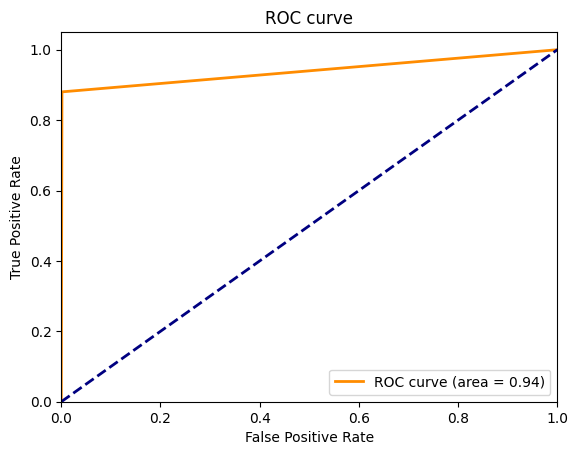

In [203]:
roc_graph(y_r_test, pred_lr_model2)

In [204]:
get_metrics(y_r_test, pred_lr_model2)

Accuracy:  0.9566088117489987
Precision:  0.9971590909090909
Recall:  0.8802507836990595
f1:  0.935064935064935
Confusion Matrix: 
AUC:  0.9394354987829551
[[2895    4]
 [ 191 1404]]


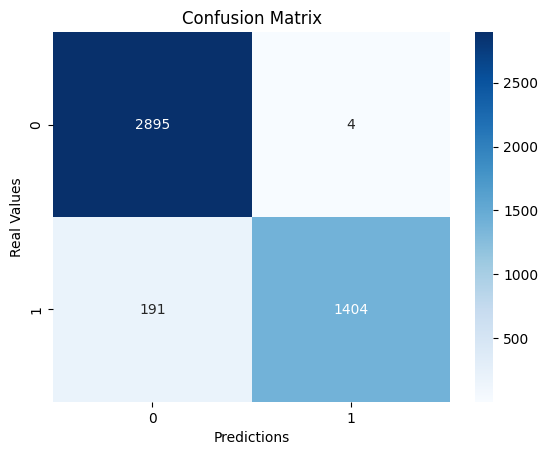

In [205]:
conf_mat(y_r_test, pred_lr_model2)

- SVM

In [206]:
svm_model2 = SVC(random_state=123, probability=True)
svm_model2.fit(X_r_train, y_r_train)
pred_svm_model2 = svm_model2.predict(X_r_test)

In [207]:
print(classification_report(y_r_test, pred_svm_model2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.89      0.94      1595

    accuracy                           0.96      4494
   macro avg       0.97      0.94      0.95      4494
weighted avg       0.96      0.96      0.96      4494



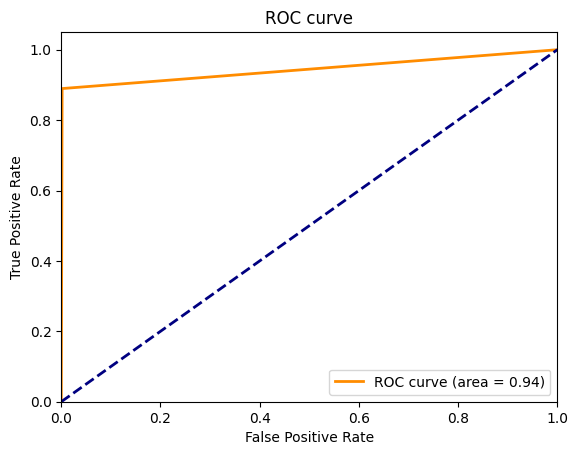

In [208]:
roc_graph(y_r_test, pred_svm_model2)

In [209]:
get_metrics(y_r_test, pred_svm_model2)

Accuracy:  0.9597240765465065
Precision:  0.9964887640449438
Recall:  0.8896551724137931
f1:  0.9400463729711825
Confusion Matrix: 
AUC:  0.9439652198736782
[[2894    5]
 [ 176 1419]]


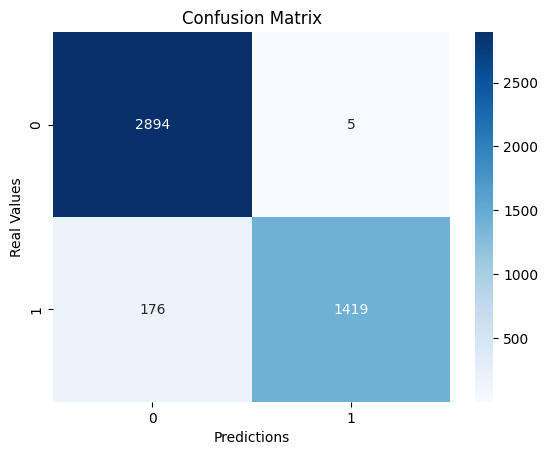

In [210]:
conf_mat(y_r_test, pred_svm_model2)

- KNN

In [211]:
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(X_r_train, y_r_train)
pred_knn_model2 = knn_model2.predict(X_r_test)

In [212]:
print(classification_report(y_r_test, pred_knn_model2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2899
           1       0.94      0.94      0.94      1595

    accuracy                           0.95      4494
   macro avg       0.95      0.95      0.95      4494
weighted avg       0.95      0.95      0.95      4494



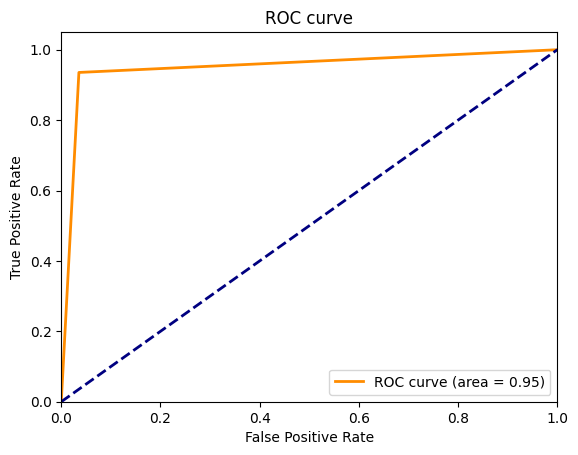

In [213]:
roc_graph(y_r_test, pred_knn_model2)

In [214]:
get_metrics(y_r_test, pred_knn_model2)

Accuracy:  0.954161103693814
Precision:  0.935423197492163
Recall:  0.935423197492163
f1:  0.935423197492163
Confusion Matrix: 
AUC:  0.9499468522817834
[[2796  103]
 [ 103 1492]]


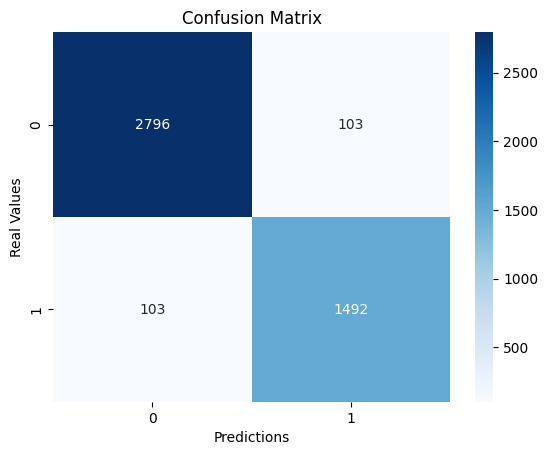

In [215]:
conf_mat(y_r_test, pred_knn_model2)

- Naive Bayes

In [216]:
nb_model2 = GaussianNB()
nb_model2.fit(X_r_train, y_r_train)
pred_nb_model2 = nb_model2.predict(X_r_test)

In [ ]:
print(classification_report(y_r_test, pred_lr_model2))

In [ ]:
roc_graph(y_r_test, pred_lr_model2)

In [ ]:
get_metrics(y_r_test, pred_lr_model2)

In [ ]:
conf_mat(y_r_test, pred_lr_model2)

- Decision Tree

In [217]:
dt_model2 = DecisionTreeClassifier(random_state=123)
dt_model2.fit(X_r_train, y_r_train)
pred_dt_model2 = dt_model2.predict(X_r_test)

In [218]:
print(classification_report(y_r_test, pred_dt_model2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2899
           1       0.88      0.93      0.90      1595

    accuracy                           0.93      4494
   macro avg       0.92      0.93      0.92      4494
weighted avg       0.93      0.93      0.93      4494



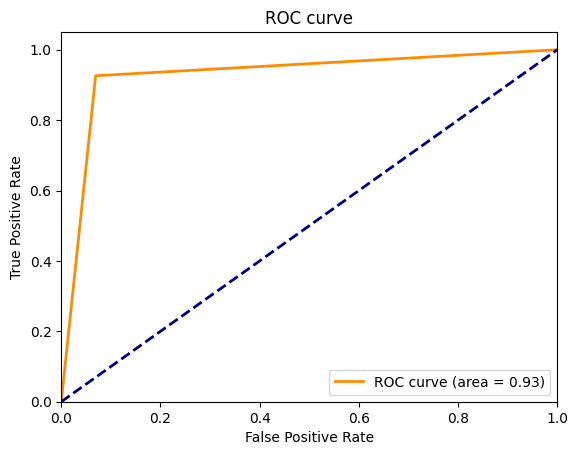

In [219]:
roc_graph(y_r_test, pred_dt_model2)

In [220]:
get_metrics(y_r_test, pred_dt_model2)

Accuracy:  0.929016466399644
Precision:  0.8802145411203814
Recall:  0.9260188087774295
f1:  0.9025358997861289
Confusion Matrix: 
AUC:  0.928342277793337
[[2698  201]
 [ 118 1477]]


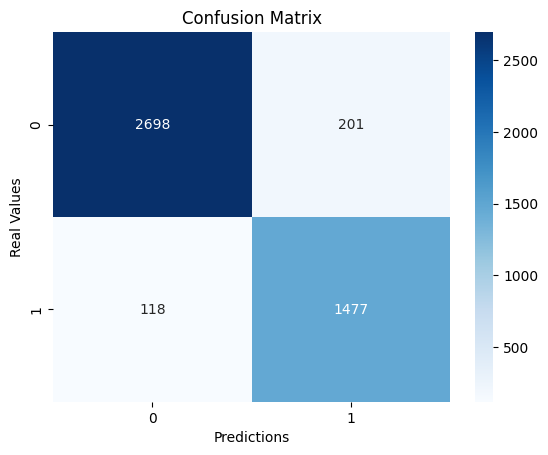

In [221]:
conf_mat(y_r_test, pred_dt_model2)

- Random Forest

In [222]:
rf_model2 = RandomForestClassifier(random_state=123)
rf_model2.fit(X_r_train, y_r_train)
pred_rf_model2 = rf_model2.predict(X_r_test)

In [223]:
print(classification_report(y_r_test, pred_rf_model2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2899
           1       0.98      0.92      0.95      1595

    accuracy                           0.96      4494
   macro avg       0.97      0.95      0.96      4494
weighted avg       0.96      0.96      0.96      4494



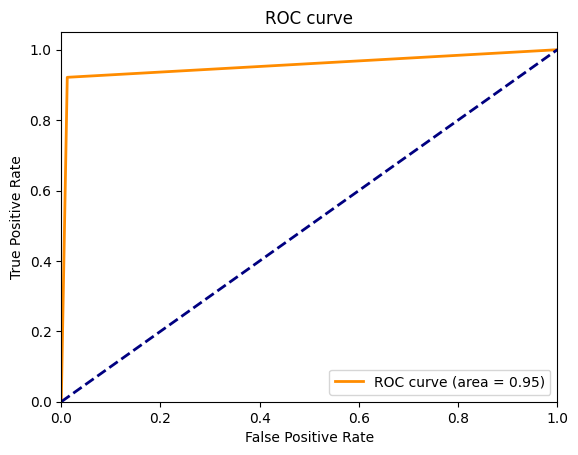

In [224]:
roc_graph(y_r_test, pred_rf_model2)

In [225]:
get_metrics(y_r_test, pred_rf_model2)

Accuracy:  0.9643969737427681
Precision:  0.9767441860465116
Recall:  0.9216300940438872
f1:  0.9483870967741935
Confusion Matrix: 
AUC:  0.9547784826894152
[[2864   35]
 [ 125 1470]]


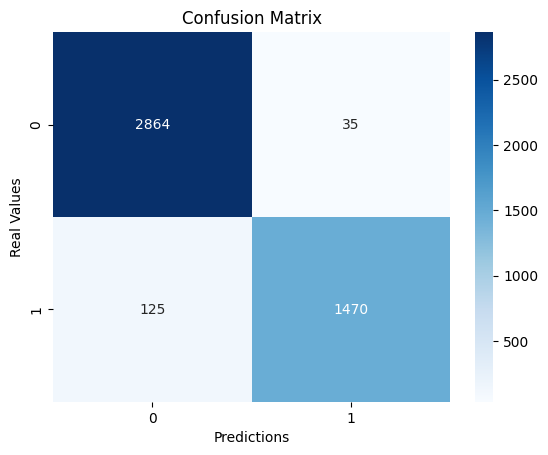

In [226]:
conf_mat(y_r_test, pred_rf_model2)

- Gradient Boosting

In [227]:
gb_model2 = GradientBoostingClassifier(random_state=123)
gb_model2.fit(X_r_train, y_r_train)
pred_gb_model2 = gb_model2.predict(X_r_test)

In [228]:
print(classification_report(y_r_test, pred_gb_model2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2899
           1       0.99      0.86      0.92      1595

    accuracy                           0.95      4494
   macro avg       0.96      0.93      0.94      4494
weighted avg       0.95      0.95      0.95      4494



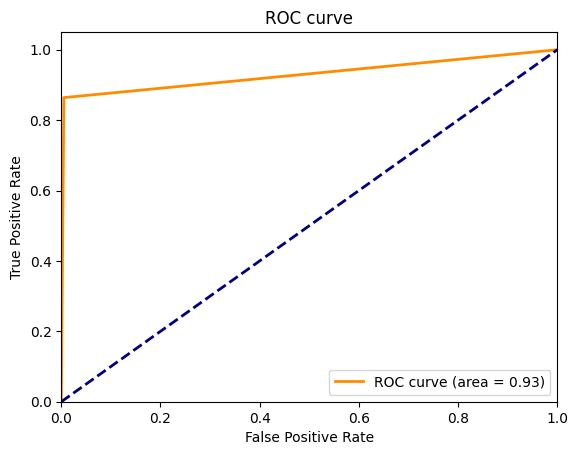

In [229]:
roc_graph(y_r_test, pred_gb_model2)

In [230]:
get_metrics(y_r_test, pred_gb_model2)

Accuracy:  0.9483756119270138
Precision:  0.9892318736539842
Recall:  0.8639498432601881
f1:  0.9223560910307899
Confusion Matrix: 
AUC:  0.9293878226304391
[[2884   15]
 [ 217 1378]]


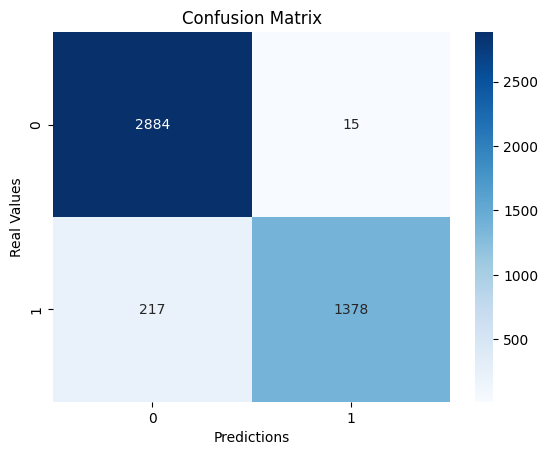

In [231]:
conf_mat(y_r_test, pred_gb_model2)

- Voting Model

In [232]:
voting_model2 = voting_model = VotingClassifier(estimators=[
        ('lr2', lr_model2),
        ('rf2', rf_model2),
        ('dt2', dt_model2),
        ('gb2', gb_model2)
    ], voting='soft')
voting_model2.fit(X_r_train, y_r_train)
pred_voting_model2 = voting_model2.predict(X_r_test)

In [233]:
print(classification_report(y_r_test, pred_voting_model2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2899
           1       0.98      0.91      0.94      1595

    accuracy                           0.96      4494
   macro avg       0.97      0.95      0.96      4494
weighted avg       0.96      0.96      0.96      4494



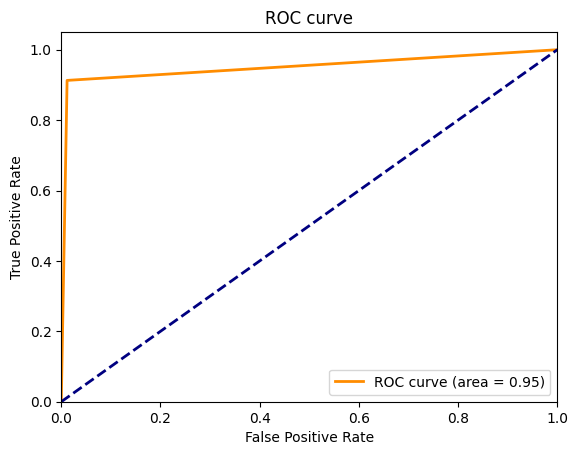

In [234]:
roc_graph(y_r_test, pred_voting_model2)

In [235]:
get_metrics(y_r_test, pred_voting_model2)

Accuracy:  0.9615042278593681
Precision:  0.9771812080536912
Recall:  0.9128526645768025
f1:  0.9439222042139385
Confusion Matrix: 
AUC:  0.9505622412225164
[[2865   34]
 [ 139 1456]]


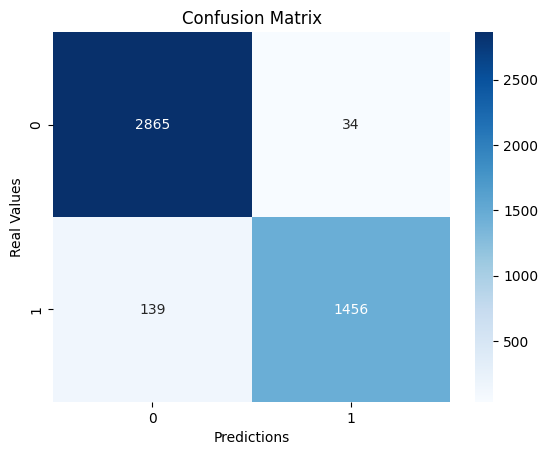

In [236]:
conf_mat(y_r_test, pred_voting_model2)

- Extreme Gradient Boosting

In [237]:
xgb_model2 = XGBClassifier(random_state=123)
xgb_model2.fit(X_r_train, y_r_train)
pred_xgb_model2 = xgb_model2.predict(X_r_test)

In [238]:
print(classification_report(y_r_test, pred_xgb_model2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2899
           1       0.99      0.90      0.94      1595

    accuracy                           0.96      4494
   macro avg       0.97      0.95      0.96      4494
weighted avg       0.96      0.96      0.96      4494



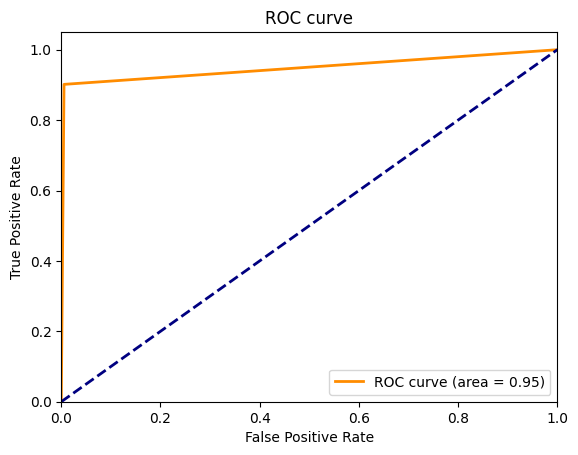

In [239]:
roc_graph(y_r_test, pred_xgb_model2)

In [240]:
get_metrics(y_r_test, pred_xgb_model2)

Accuracy:  0.9615042278593681
Precision:  0.9889958734525447
Recall:  0.9015673981191222
f1:  0.9432600852738603
Confusion Matrix: 
AUC:  0.9480241267932623
[[2883   16]
 [ 157 1438]]


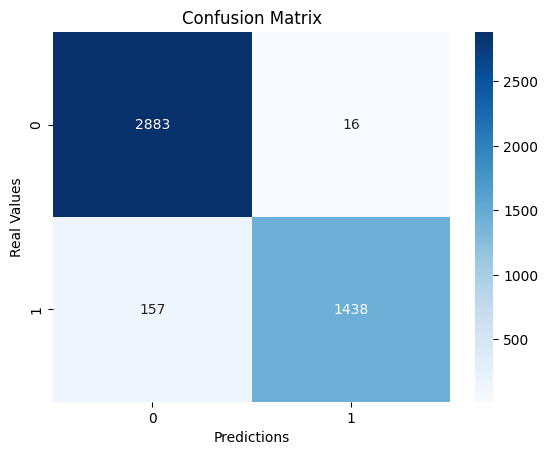

In [241]:
conf_mat(y_r_test, pred_xgb_model2)

- Stratified cross-validation

In [243]:
models_cv = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "DT": DecisionTreeClassifier(random_state=123),
    "RF": RandomForestClassifier(random_state=123),
    "GB": GradientBoostingClassifier(random_state=123),
    "XGB": XGBClassifier(random_state=123),
}

def skf_comparison(models, X_train, y_train):

    results = []
    names = []

    for k, v in models.items():

        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
        cv_scores = cross_val_score(v, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('CV AUC: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-----------------------------------')

    return(results, names)


results, names = skf_comparison(models_cv, X_r_train, y_r_train)

Logistic Regression
CV AUC: 0.97473 +/- 0.00313
-----------------------------------
SVM
CV AUC: 0.97470 +/- 0.00292
-----------------------------------
KNN
CV AUC: 0.97958 +/- 0.00275
-----------------------------------
Naive Bayes
CV AUC: 0.79879 +/- 0.03215
-----------------------------------
DT
CV AUC: 0.92065 +/- 0.00742
-----------------------------------
RF
CV AUC: 0.98977 +/- 0.00174
-----------------------------------
GB
CV AUC: 0.97790 +/- 0.00251
-----------------------------------
XGB
CV AUC: 0.97953 +/- 0.00285
-----------------------------------


### Boosting SVM model Performance

In [249]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [250]:
svm_model3 = SVC(probability=True, random_state=123)

grid_search_svm = GridSearchCV(
    estimator=svm_model3,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,
    verbose=2,
    n_jobs=-1
)

grid_search_svm.fit(X_r_train, y_r_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=SVC(probability=True, random_state=123), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'poly']},
             scoring='f1_weighted', verbose=2)

In [251]:
print(f"Best Hyperparameters for SVM: ", grid_search_svm.best_params_)

Best Hyperparameters for SVM:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [252]:
svm_model3 = SVC(random_state=123, probability=True, kernel='rbf', C=10, gamma='scale')
svm_model3.fit(X_r_train, y_r_train)
pred_svm_model3 = svm_model3.predict(X_r_test)

In [253]:
print(classification_report(y_r_test, pred_svm_model3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2899
           1       0.99      0.89      0.94      1595

    accuracy                           0.96      4494
   macro avg       0.97      0.95      0.96      4494
weighted avg       0.96      0.96      0.96      4494



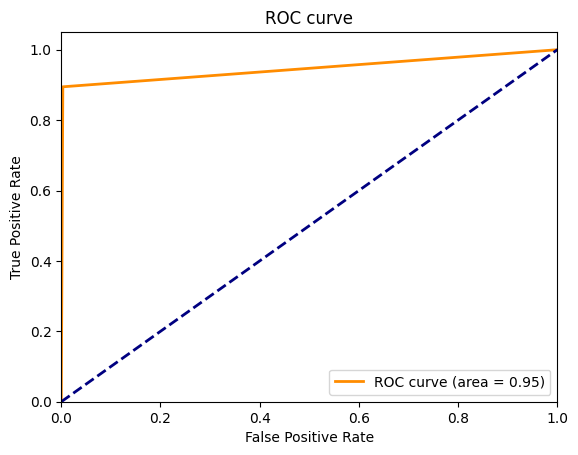

In [254]:
roc_graph(y_r_test, pred_svm_model3)

In [255]:
get_metrics(y_r_test, pred_svm_model3)

Accuracy:  0.9606141522029372
Precision:  0.9937325905292479
Recall:  0.8946708463949843
f1:  0.9416034312108215
Confusion Matrix: 
AUC:  0.9457831637976991
[[2890    9]
 [ 168 1427]]


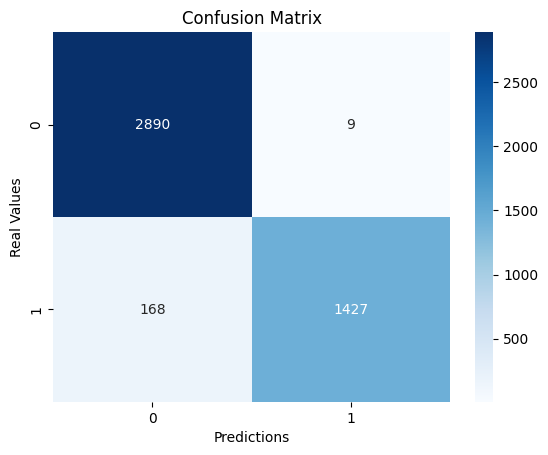

In [256]:
conf_mat(y_r_test, pred_svm_model3)